# Module 3: The Matrix

How are your neighbors effecting you?
****

The Threshold filter from Module 2 modified the image by changing pixel value depending on if it was above or below a fixed value.  The each discrete pixel was modified in insolation.  Another way to modify an image would be to change the pixel value in relation to the neighboring pixels.  To accomplish this we use a matrix of numbers called a **convolution kernel**.  

Sharpen:

| <span style="font-weight:normal">-1</span> | <span style="font-weight:normal">-1</span> | <span style="font-weight:normal">-1</span> |
|----------|:-------------:|------:|
| -1 |  5 | -1 |
| -1 | -1 | -1 |

Blur:

| <span style="font-weight:normal">1/5</span> | <span style="font-weight:normal">1/5</span> | <span style="font-weight:normal">1/5</span> |
|----------|:-------------:|------:|
| 1/5 | 1/5 | 1/5 |
| 1/5 | 1/5 | 1/5 |

    


Matrix operation.  List of filters.  Walk through coding examples.

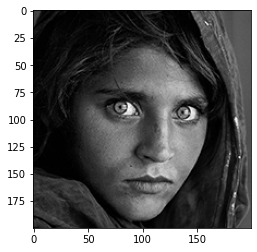

In [3]:
#Install Open CV and give tutorial on getting Jupyter notebook up and running.
# %pip install opencv-contrib-python
# %pip install matplotlib

#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Saving and displaying an image
img = cv2.imread('Graphics/face.png')

#OpenCV by defualt uses BGR instead of RGB.  First convert the color values to greyscale using the OpenCV implementation.  Then convert from BGR to RGB to draw to the screen.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2.imshow('Face',img)
#Use matplotlib while using a python notebook
plt.imshow(img)


In [ ]:
#Let's turn the black pixels red to show there location

#Let's copy our image and create a blank image array to store our threshold.
imgGrey = copy.deepcopy(img)
imgThres = np.zeros((200,200,3), dtype=np.uint8)

# Kernel to perform convulotion
kernel = np.array((-1,0,1),(-2,0,2),(-1,0,1))

#For each row in our grid.  Skip the first and last row
for y in range(1,h-1):
    #Search each pixel in the row. Skip the left and right columns.
    for x in range(1,w-1):
        # Search the pixels all around.
        for ky in range(-1,ky-1):
            for kx in range(-1,kx-1):


        

#Combine the greyscale and the thresholded image along the so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
imgTwo = np.concatenate((imgGrey, imgThres), axis=1)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(imgTwo)